Author: Jerry Wu
<br>
Date: 5/10/23
<br>
Purpose: To troubleshoot the DORA2 and verify functionailty before implementation into a GUI
<br>


In [1]:
import sys


### Please append the SMA folder that contains DORA 
sys.path.append(r'D:\Jerry\code\OMMxDORA-tomerge\sma')


import DORA2 as DORA
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import sma_lib.MAP_Parameters as params

-1


In [2]:
xmlname = "DORA2_settings"

#read in the settings in the .xml file using hazen's Parameter Class
pars = params.Parameters(xmlname+'.xml') #par is an object of type Parameters, defined in sa_library
#to access parameters, use par.parameter name. eg par.start_frame
#note these values can be manually changed: par.frameset = 200 replaces whatever was there.
print(pars.end_frame)

-1


In [10]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
# dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set" #select folder
# selected_csv = 'RecBCD_placeholder_intensity.csv' 
dir_path = r"D:\Jerry\code\OMMxDORA-tomerge\test_set\three_csv" #select folder
selected_csv = 'OrbitBiotin500Hz100Lz_1k_00001_trimmed.csv' 


#Change the folder directory to be the current folder's 
os.chdir(dir_path)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path

path_OG = os.getcwd()

In [11]:
# read CSV file into Pandas DataFrame
csv_path = os.path.join(dir_path, selected_csv)
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Add an index column as the first column
df.insert(0, 'index', range(len(df)))

# Rename the first four columns as 'index', 'X position', 'Y position', and 'Intensity'
df.columns.values[:4] = ['index','X position', 'Y position', 'Intensity']

# Display the updated DataFrame
print(df)

     index  X position  Y position  Intensity
0        0    5.957685   71.602509     1473.0
1        1    5.856493   71.599800     1463.0
2        2    5.682285   71.716194     1288.0
3        3    5.770096   71.555923     1343.0
4        4    5.678628   71.707909     1274.0
..     ...         ...         ...        ...
994    994    5.903415   71.614883     1268.0
995    995    5.746070   71.562057     1075.0
996    996    5.661738   71.722450     1113.0
997    997    5.851049   71.452736     1393.0
998    998    5.837666   71.287331     1185.0

[999 rows x 4 columns]


In [4]:
data, __ , __ = DORA.load_csv(selected_csv,dir_path)
center, radius_estimate = DORA.find_center(data)
data = DORA.calculate_time_angle(data,center)
if pars.processing == "downsample":
    down_sampled_df,frame_start,frame_end = DORA.downsample(data)
else:
    down_sampled_df = DORA.downsample(data)


      index  X position  Y position   Intensity
0         0   989.46265   150.68140  601.443273
1         1   989.48285   150.66527  291.806454
2         2   989.51483   150.74721  948.654430
3         3   989.52441   150.68672  189.585776
4         4   989.55579   150.69719   43.818101
...     ...         ...         ...         ...
1394   1394   988.92511   150.38559  342.414848
1395   1395   989.01135   150.25105  771.651993
1396   1396   989.02032   150.32292  280.880356
1397   1397   988.93652   150.29860  913.397543
1398   1398   988.92273   150.36961  903.399069

[1399 rows x 4 columns]
 The following CSV has been read: RecBCD_placeholder_intensity.csv
From center_hist_max, the center is [988.961698, 150.2293804]
Time and Angle columns have been calculated


labels have been set
labels have printed


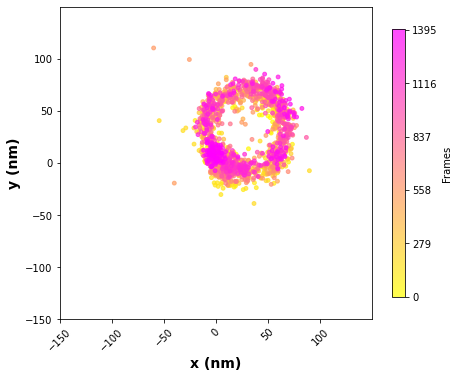

In [5]:
DORA.plot_2D_graph(down_sampled_df,)

labels have been set
labels have printed


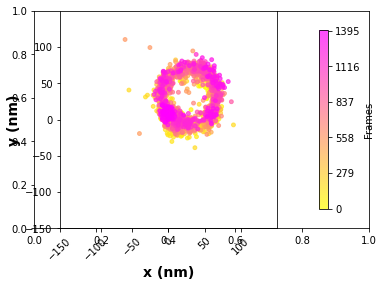

In [8]:
fig_2D, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(down_sampled_df, fig = fig_2D)


labels have been set
labels have printed


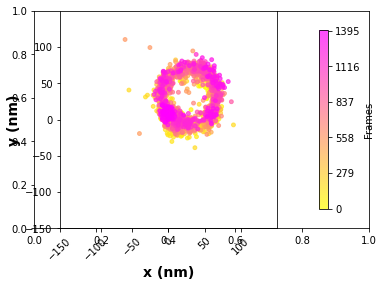

In [7]:
fig_2D_1, ax_2D = plt.subplots(1,1)
DORA.plot_2D_graph(down_sampled_df, fig = fig_2D_1)

In [12]:
df = down_sampled_df

In [15]:
slider_value = 3
df[slider_value:slider_value+50]

,index,X position,Y position,Intensity,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms),Radius (nm),z-score Rad,Angle
3,3,989.52441,150.68672,189.585776,0.562712,0.45734,56.2712,45.73396,60.0,72.512365,0.896332,320.897795
4,4,989.55579,150.69719,43.818101,0.594092,0.46781,59.4092,46.78096,80.0,75.616872,1.008101,321.781821
5,5,989.59442,150.78535,720.064331,0.632722,0.55597,63.2722,55.59696,100.0,84.228221,1.318127,318.694392
6,6,989.39166,150.84840,983.619465,0.429962,0.61902,42.9962,61.90196,120.0,75.369263,0.999187,304.783281
7,7,989.57416,150.84720,823.106540,0.612462,0.61782,61.2462,61.78196,140.0,86.994871,1.417733,314.750491
8,8,989.41174,150.89397,780.260172,0.450042,0.66459,45.0042,66.45896,160.0,80.263138,1.175376,304.104789
9,9,989.57495,150.73187,319.595290,0.613252,0.50249,61.3252,50.24896,180.0,79.282647,1.140077,320.669317
10,10,989.59973,150.77824,883.207055,0.638032,0.54886,63.8032,54.88596,200.0,84.162444,1.315759,319.296619
11,11,989.50580,150.62512,86.667920,0.544102,0.39574,54.4102,39.57396,220.0,67.279775,0.707948,323.970626
12,12,989.43762,150.88622,677.078443,0.475922,0.65684,47.5922,65.68396,240.0,81.113501,1.205991,305.925715
